# Introduction to Python  

### Pandas

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
%matplotlib inline

In [2]:
datapath = "../Data/"

### Pandas Data Structures: Series

In [3]:
obj = pd.Series([4, 12, -5, 3, 5])
obj

0     4
1    12
2    -5
3     3
4     5
dtype: int64

In [4]:
obj.values

array([ 4, 12, -5,  3,  5])

In [5]:
obj.index

RangeIndex(start=0, stop=5, step=1)

In [6]:
obj.index = ['Bob', 'Steve', 'Jeff', 'Ryan', 'Fernie']
obj

Bob        4
Steve     12
Jeff      -5
Ryan       3
Fernie     5
dtype: int64

In [7]:
obj2 = pd.Series([4, 7, -5, 3], index=['d', 'b', 'a', 'c'])
obj2

d    4
b    7
a   -5
c    3
dtype: int64

In [8]:
obj2['c']

3

In [9]:
obj2[['c', 'a', 'd']]

c    3
a   -5
d    4
dtype: int64

In [10]:
obj2[obj2 < 0]

a   -5
dtype: int64

In [11]:
obj2 * 2

d     8
b    14
a   -10
c     6
dtype: int64

In [12]:
np.exp(obj2)

d      54.598150
b    1096.633158
a       0.006738
c      20.085537
dtype: float64

In [13]:
sdata = {'Ohio': 35000, 'Texas': 71000, 'Oregon': 16000, 'Utah': 5000}
obj3 = pd.Series(sdata)
obj3

Ohio      35000
Texas     71000
Oregon    16000
Utah       5000
dtype: int64

In [14]:
states = ['California', 'Ohio', 'Oregon', 'Texas']
obj4 = pd.Series(sdata, index=states)
obj4

California        NaN
Ohio          35000.0
Oregon        16000.0
Texas         71000.0
dtype: float64

In [15]:
pd.isnull(obj4)

California     True
Ohio          False
Oregon        False
Texas         False
dtype: bool

In [16]:
pd.notnull(obj4)

California    False
Ohio           True
Oregon         True
Texas          True
dtype: bool

In [17]:
obj3.add(obj4, fill_value=10)

California         NaN
Ohio           70000.0
Oregon         32000.0
Texas         142000.0
Utah            5010.0
dtype: float64

In [18]:
obj4.name = 'Population'
obj4.index.name = 'State'
obj4

State
California        NaN
Ohio          35000.0
Oregon        16000.0
Texas         71000.0
Name: Population, dtype: float64

#### Pandas Data Structures: Dataframe

In [19]:
data = {'state': ['Ohio', 'Ohio', 'Ohio', 'Nevada', 'Nevada'],
        'year': [2000, 2001, 2002, 2001, 2002],
        'pop': [1.5, 1.7, 3.6, 2.4, 2.9]}
frame = pd.DataFrame(data)
frame

,state,year,pop
0,Ohio,2000,1.5
1,Ohio,2001,1.7
2,Ohio,2002,3.6
3,Nevada,2001,2.4
4,Nevada,2002,2.9


In [20]:
d = pd.DataFrame(data, columns=['year', 'state', 'pop'])
d

,year,state,pop
0,2000,Ohio,1.5
1,2001,Ohio,1.7
2,2002,Ohio,3.6
3,2001,Nevada,2.4
4,2002,Nevada,2.9


In [21]:
d.set_index('year', inplace=True)

In [22]:
d.drop(2000, axis=0)

,state,pop
year,,
2001,Ohio,1.7
2002,Ohio,3.6
2001,Nevada,2.4
2002,Nevada,2.9


In [23]:
d

,state,pop
year,,
2000,Ohio,1.5
2001,Ohio,1.7
2002,Ohio,3.6
2001,Nevada,2.4
2002,Nevada,2.9


In [24]:
frame2 = pd.DataFrame(data, columns=['year', 'state', 'pop', 'debt'],
                      index=['one', 'two', 'three', 'four', 'five'])
frame2

,year,state,pop,debt
one,2000,Ohio,1.5,NaN
two,2001,Ohio,1.7,NaN
three,2002,Ohio,3.6,NaN
four,2001,Nevada,2.4,NaN
five,2002,Nevada,2.9,NaN


In [25]:
frame2['nova'] = 13
frame2

,year,state,pop,debt,nova
one,2000,Ohio,1.5,NaN,13
two,2001,Ohio,1.7,NaN,13
three,2002,Ohio,3.6,NaN,13
four,2001,Nevada,2.4,NaN,13
five,2002,Nevada,2.9,NaN,13


In [26]:
frame2.loc['three']

year     2002
state    Ohio
pop       3.6
debt      NaN
nova       13
Name: three, dtype: object

In [27]:
frame2.iloc[2]

year     2002
state    Ohio
pop       3.6
debt      NaN
nova       13
Name: three, dtype: object

In [28]:
frame2.nova = 23
frame2

,year,state,pop,debt,nova
one,2000,Ohio,1.5,NaN,23
two,2001,Ohio,1.7,NaN,23
three,2002,Ohio,3.6,NaN,23
four,2001,Nevada,2.4,NaN,23
five,2002,Nevada,2.9,NaN,23


In [29]:
frame2.columns

Index(['year', 'state', 'pop', 'debt', 'nova'], dtype='object')

In [30]:
print(frame2['state'])
print()
print(type(frame2['state']))

one        Ohio
two        Ohio
three      Ohio
four     Nevada
five     Nevada
Name: state, dtype: object

<class 'pandas.core.series.Series'>


In [31]:
frame2.state

one        Ohio
two        Ohio
three      Ohio
four     Nevada
five     Nevada
Name: state, dtype: object

In [32]:
#frame2.loc['three']
frame2.loc['three','state']

'Ohio'

In [33]:
frame2['debt'] = 16.5
frame2

,year,state,pop,debt,nova
one,2000,Ohio,1.5,16.5,23
two,2001,Ohio,1.7,16.5,23
three,2002,Ohio,3.6,16.5,23
four,2001,Nevada,2.4,16.5,23
five,2002,Nevada,2.9,16.5,23


In [34]:
frame2['debt'] = np.arange(5.)
frame2

,year,state,pop,debt,nova
one,2000,Ohio,1.5,0.0,23
two,2001,Ohio,1.7,1.0,23
three,2002,Ohio,3.6,2.0,23
four,2001,Nevada,2.4,3.0,23
five,2002,Nevada,2.9,4.0,23


In [35]:
val = pd.Series([-1.2, -1.5, -1.7], index=['two', 'four', 'five'])
frame2['debt'] = val
frame2

,year,state,pop,debt,nova
one,2000,Ohio,1.5,NaN,23
two,2001,Ohio,1.7,-1.2,23
three,2002,Ohio,3.6,NaN,23
four,2001,Nevada,2.4,-1.5,23
five,2002,Nevada,2.9,-1.7,23


In [36]:
frame2['eastern'] = frame2.state == 'Ohio'
frame2

,year,state,pop,debt,nova,eastern
one,2000,Ohio,1.5,NaN,23,True
two,2001,Ohio,1.7,-1.2,23,True
three,2002,Ohio,3.6,NaN,23,True
four,2001,Nevada,2.4,-1.5,23,False
five,2002,Nevada,2.9,-1.7,23,False


In [37]:
del frame2['eastern']
frame2.columns

Index(['year', 'state', 'pop', 'debt', 'nova'], dtype='object')

In [38]:
pivot = frame2.pivot(index= 'year', columns='state', values='pop') 
pivot

state,Nevada,Ohio
year,,
2000,NaN,1.5
2001,2.4,1.7
2002,2.9,3.6


In [39]:
transpose = pivot.T
transpose

year,2000,2001,2002
state,,,
Nevada,NaN,2.4,2.9
Ohio,1.5,1.7,3.6


In [40]:
pop = {'Nevada': {2001: 2.4, 2002: 2.9},'Ohio': {2000: 1.5, 2001: 1.7, 2002: 3.6}}
frame3 = pd.DataFrame(pop)
frame3

,Nevada,Ohio
2001,2.4,1.7
2002,2.9,3.6
2000,NaN,1.5


In [41]:
frame3.T

,2001,2002,2000
Nevada,2.4,2.9,NaN
Ohio,1.7,3.6,1.5


In [42]:
type(pop)

dict

In [43]:
pd.DataFrame(pop, index=[2001, 2002, 2003])

,Nevada,Ohio
2001,2.4,1.7
2002,2.9,3.6
2003,NaN,NaN


In [44]:
pdata = {'Ohio': frame3['Ohio'][:-1],'Nevada': frame3['Nevada'][:2]}
pd.DataFrame(pdata)

,Ohio,Nevada
2001,1.7,2.4
2002,3.6,2.9


In [45]:
frame3.index.name = 'year'; frame3.columns.name = 'state'
frame3

state,Nevada,Ohio
year,,
2001,2.4,1.7
2002,2.9,3.6
2000,NaN,1.5


In [46]:
pop = {'Nevada': {2001: 2.4, 2002: 2.9},'Ohio': {2000: 1.5, 2001: 1.7, 2002: 3.6}}
frame4 = pd.DataFrame(pop)
frame4

,Nevada,Ohio
2001,2.4,1.7
2002,2.9,3.6
2000,NaN,1.5


In [47]:
frame4.loc[2000,'Nevada'] = 2
frame4

,Nevada,Ohio
2001,2.4,1.7
2002,2.9,3.6
2000,2.0,1.5


In [48]:
frame5 = pd.concat([frame4, frame4], axis=0)
frame5.iloc[3,1] = 32
frame5

,Nevada,Ohio
2001,2.4,1.7
2002,2.9,3.6
2000,2.0,1.5
2001,2.4,32.0
2002,2.9,3.6
2000,2.0,1.5


In [49]:
frame5.drop_duplicates(['Nevada'])

,Nevada,Ohio
2001,2.4,1.7
2002,2.9,3.6
2000,2.0,1.5


In [50]:
dates = pd.date_range("20160101", periods=10, freq='D')
data = np.random.random((10,3))
column_names = ['Column1', 'Column2', 'Column3']

In [51]:
dates

DatetimeIndex(['2016-01-01', '2016-01-02', '2016-01-03', '2016-01-04',
               '2016-01-05', '2016-01-06', '2016-01-07', '2016-01-08',
               '2016-01-09', '2016-01-10'],
              dtype='datetime64[ns]', freq='D')

In [52]:
data

array([[0.22044468, 0.46516144, 0.26816403],
       [0.18670937, 0.77334001, 0.12328543],
       [0.67961514, 0.1608355 , 0.06457368],
       [0.0817348 , 0.33847428, 0.85367375],
       [0.3010376 , 0.63671488, 0.99094902],
       [0.7075992 , 0.7762117 , 0.23406838],
       [0.00377628, 0.83533537, 0.6152374 ],
       [0.82872389, 0.21130363, 0.92291727],
       [0.84097456, 0.15129846, 0.75389698],
       [0.82248968, 0.69357995, 0.87198978]])

In [53]:
df = pd.DataFrame(data, index=dates, columns=column_names)
df.head(10)

,Column1,Column2,Column3
2016-01-01,0.220445,0.465161,0.268164
2016-01-02,0.186709,0.773340,0.123285
2016-01-03,0.679615,0.160836,0.064574
2016-01-04,0.081735,0.338474,0.853674
2016-01-05,0.301038,0.636715,0.990949
2016-01-06,0.707599,0.776212,0.234068
2016-01-07,0.003776,0.835335,0.615237
2016-01-08,0.828724,0.211304,0.922917
2016-01-09,0.840975,0.151298,0.753897
2016-01-10,0.822490,0.693580,0.871990


In [54]:
df.iloc[0:11,1]

2016-01-01    0.465161
2016-01-02    0.773340
2016-01-03    0.160836
2016-01-04    0.338474
2016-01-05    0.636715
2016-01-06    0.776212
2016-01-07    0.835335
2016-01-08    0.211304
2016-01-09    0.151298
2016-01-10    0.693580
Freq: D, Name: Column2, dtype: float64

In [55]:
df[1:3]

,Column1,Column2,Column3
2016-01-02,0.186709,0.773340,0.123285
2016-01-03,0.679615,0.160836,0.064574


In [56]:
df['20160104':'20160107']

,Column1,Column2,Column3
2016-01-04,0.081735,0.338474,0.853674
2016-01-05,0.301038,0.636715,0.990949
2016-01-06,0.707599,0.776212,0.234068
2016-01-07,0.003776,0.835335,0.615237


In [57]:
df[(df.index>'20150101')&(df.index<'20160106')]

,Column1,Column2,Column3
2016-01-01,0.220445,0.465161,0.268164
2016-01-02,0.186709,0.773340,0.123285
2016-01-03,0.679615,0.160836,0.064574
2016-01-04,0.081735,0.338474,0.853674
2016-01-05,0.301038,0.636715,0.990949


In [58]:
df.loc['20160101':'20160102',['Column1','Column3']]

,Column1,Column3
2016-01-01,0.220445,0.268164
2016-01-02,0.186709,0.123285


In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 10 entries, 2016-01-01 to 2016-01-10
Freq: D
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Column1  10 non-null     float64
 1   Column2  10 non-null     float64
 2   Column3  10 non-null     float64
dtypes: float64(3)
memory usage: 640.0 bytes


In [60]:
df.iloc[3:5, 0:2]

,Column1,Column2
2016-01-04,0.081735,0.338474
2016-01-05,0.301038,0.636715


In [61]:
df.describe()

,Column1,Column2,Column3
count,10.000000,10.000000,10.000000
mean,0.467311,0.504226,0.569876
std,0.338307,0.272176,0.360285
min,0.003776,0.151298,0.064574
25%,0.195143,0.243096,0.242592
50%,0.490326,0.550938,0.684567
75%,0.793767,0.753400,0.867411
max,0.840975,0.835335,0.990949


In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 10 entries, 2016-01-01 to 2016-01-10
Freq: D
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Column1  10 non-null     float64
 1   Column2  10 non-null     float64
 2   Column3  10 non-null     float64
dtypes: float64(3)
memory usage: 640.0 bytes


In [63]:
df.sort_index(axis=0, ascending=True,) # inplace=True)

,Column1,Column2,Column3
2016-01-01,0.220445,0.465161,0.268164
2016-01-02,0.186709,0.773340,0.123285
2016-01-03,0.679615,0.160836,0.064574
2016-01-04,0.081735,0.338474,0.853674
2016-01-05,0.301038,0.636715,0.990949
2016-01-06,0.707599,0.776212,0.234068
2016-01-07,0.003776,0.835335,0.615237
2016-01-08,0.828724,0.211304,0.922917
2016-01-09,0.840975,0.151298,0.753897
2016-01-10,0.822490,0.693580,0.871990


In [64]:
df[sorted(df.columns)]

,Column1,Column2,Column3
2016-01-01,0.220445,0.465161,0.268164
2016-01-02,0.186709,0.773340,0.123285
2016-01-03,0.679615,0.160836,0.064574
2016-01-04,0.081735,0.338474,0.853674
2016-01-05,0.301038,0.636715,0.990949
2016-01-06,0.707599,0.776212,0.234068
2016-01-07,0.003776,0.835335,0.615237
2016-01-08,0.828724,0.211304,0.922917
2016-01-09,0.840975,0.151298,0.753897
2016-01-10,0.822490,0.693580,0.871990


In [65]:
df.sort_values(by='Column2')

,Column1,Column2,Column3
2016-01-09,0.840975,0.151298,0.753897
2016-01-03,0.679615,0.160836,0.064574
2016-01-08,0.828724,0.211304,0.922917
2016-01-04,0.081735,0.338474,0.853674
2016-01-01,0.220445,0.465161,0.268164
2016-01-05,0.301038,0.636715,0.990949
2016-01-10,0.822490,0.693580,0.871990
2016-01-02,0.186709,0.773340,0.123285
2016-01-06,0.707599,0.776212,0.234068
2016-01-07,0.003776,0.835335,0.615237


In [66]:
dates1 = pd.date_range("20160101", periods=6)
data1 = np.random.random((6,2))
column_names1 = ['ColumnA', 'ColumnB']

dates2 = pd.date_range("20160101", periods=7)
data2 = np.random.random((7,2))
column_names2 = ['ColumnC', 'ColumnD']

df1 = pd.DataFrame(data1, index=dates1, columns=column_names1)
df2 = pd.DataFrame(data2, index=dates2, columns=column_names2)

In [67]:
df1

,ColumnA,ColumnB
2016-01-01,0.298003,0.747523
2016-01-02,0.861153,0.246036
2016-01-03,0.811272,0.175819
2016-01-04,0.681380,0.185336
2016-01-05,0.659882,0.122688
2016-01-06,0.735467,0.025609


In [68]:
df2

,ColumnC,ColumnD
2016-01-01,0.018310,0.024582
2016-01-02,0.972650,0.059055
2016-01-03,0.415311,0.123123
2016-01-04,0.562956,0.476588
2016-01-05,0.900496,0.261367
2016-01-06,0.975040,0.517963
2016-01-07,0.138920,0.436528


In [69]:
#https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html
df1.join(df2, how='left')

,ColumnA,ColumnB,ColumnC,ColumnD
2016-01-01,0.298003,0.747523,0.018310,0.024582
2016-01-02,0.861153,0.246036,0.972650,0.059055
2016-01-03,0.811272,0.175819,0.415311,0.123123
2016-01-04,0.681380,0.185336,0.562956,0.476588
2016-01-05,0.659882,0.122688,0.900496,0.261367
2016-01-06,0.735467,0.025609,0.975040,0.517963


In [70]:
df1.join(df2, how='right')

,ColumnA,ColumnB,ColumnC,ColumnD
2016-01-01,0.298003,0.747523,0.018310,0.024582
2016-01-02,0.861153,0.246036,0.972650,0.059055
2016-01-03,0.811272,0.175819,0.415311,0.123123
2016-01-04,0.681380,0.185336,0.562956,0.476588
2016-01-05,0.659882,0.122688,0.900496,0.261367
2016-01-06,0.735467,0.025609,0.975040,0.517963
2016-01-07,NaN,NaN,0.138920,0.436528


In [71]:
df1.join(df2, how='outer')

,ColumnA,ColumnB,ColumnC,ColumnD
2016-01-01,0.298003,0.747523,0.018310,0.024582
2016-01-02,0.861153,0.246036,0.972650,0.059055
2016-01-03,0.811272,0.175819,0.415311,0.123123
2016-01-04,0.681380,0.185336,0.562956,0.476588
2016-01-05,0.659882,0.122688,0.900496,0.261367
2016-01-06,0.735467,0.025609,0.975040,0.517963
2016-01-07,NaN,NaN,0.138920,0.436528


In [72]:
df1.join(df2, how='inner')

,ColumnA,ColumnB,ColumnC,ColumnD
2016-01-01,0.298003,0.747523,0.018310,0.024582
2016-01-02,0.861153,0.246036,0.972650,0.059055
2016-01-03,0.811272,0.175819,0.415311,0.123123
2016-01-04,0.681380,0.185336,0.562956,0.476588
2016-01-05,0.659882,0.122688,0.900496,0.261367
2016-01-06,0.735467,0.025609,0.975040,0.517963


In [73]:
df2['ColumnA'] = df1.ColumnA+1
df1.join(df2, how='left', rsuffix='_df2')

,ColumnA,ColumnB,ColumnC,ColumnD,ColumnA_df2
2016-01-01,0.298003,0.747523,0.018310,0.024582,1.298003
2016-01-02,0.861153,0.246036,0.972650,0.059055,1.861153
2016-01-03,0.811272,0.175819,0.415311,0.123123,1.811272
2016-01-04,0.681380,0.185336,0.562956,0.476588,1.681380
2016-01-05,0.659882,0.122688,0.900496,0.261367,1.659882
2016-01-06,0.735467,0.025609,0.975040,0.517963,1.735467


In [74]:
del df2['ColumnA']
df3 = df1.join(df2)

# add a column to df to group on
df3['ProfitLoss'] = pd.Series(['Profit', 
                               'Loss', 
                               'Profit', 
                               'Same', 
                               'Profit', 
                               'Loss', 
                               'Profit', 
                               'Profit', 
                               'Same', 
                               'Loss'], index=dates)

In [75]:
df3['Aluno'] = pd.Series(['Alessandra',
                         'Alessandra',
                         'Alessandra',
                         'Marcos',
                         'Ana',
                         'Ana',
                         'Marcos',
                         'Ana',
                         'Ana',
                         'Juliana'], index=dates)

In [76]:
df3

,ColumnA,ColumnB,ColumnC,ColumnD,ProfitLoss,Aluno
2016-01-01,0.298003,0.747523,0.018310,0.024582,Profit,Alessandra
2016-01-02,0.861153,0.246036,0.972650,0.059055,Loss,Alessandra
2016-01-03,0.811272,0.175819,0.415311,0.123123,Profit,Alessandra
2016-01-04,0.681380,0.185336,0.562956,0.476588,Same,Marcos
2016-01-05,0.659882,0.122688,0.900496,0.261367,Profit,Ana
2016-01-06,0.735467,0.025609,0.975040,0.517963,Loss,Ana


In [77]:
grupos = df3.groupby('ProfitLoss')#.mean()
grupos.mean()

,ColumnA,ColumnB,ColumnC,ColumnD
ProfitLoss,,,,
Loss,0.798310,0.135823,0.973845,0.288509
Profit,0.589719,0.348677,0.444706,0.136358
Same,0.681380,0.185336,0.562956,0.476588


In [78]:
max(['abacaxi', 'laranja', 'maçã'])

'maçã'

In [79]:
df4 = df3.groupby(['Aluno','ProfitLoss']).max()
df4

ColumnA   ColumnB   ColumnC   ColumnD
Aluno      ProfitLoss                                        
Alessandra Loss        0.861153  0.246036  0.972650  0.059055
           Profit      0.811272  0.747523  0.415311  0.123123
Ana        Loss        0.735467  0.025609  0.975040  0.517963
           Profit      0.659882  0.122688  0.900496  0.261367
Marcos     Same        0.681380  0.185336  0.562956  0.476588

In [80]:
df4.index.get_level_values('Aluno')

Index(['Alessandra', 'Alessandra', 'Ana', 'Ana', 'Marcos'], dtype='object', name='Aluno')

In [81]:
df4.loc[('Ana','Profit'), 'ColumnA']

0.6598821683475038

Plotting with Pandas  
--

In [82]:
dfvote = pd.read_excel(os.path.join('../Data','votesurvey.xls'), 'votesurvey')
dfvote.head()

,Gender,Age,Salary before Stern,Expected salary,Candidate
0,Male,27,60000,110000,Bush
1,Male,30,125000,125000,Bush
2,Male,27,50000,120000,Bush
3,Male,26,56000,100000,Bush
4,Male,27,82000,100000,Bush


In [83]:
dfvote.sort_values(by=['Age','Expected salary'], ascending=[True, False])[0:10]

,Gender,Age,Salary before Stern,Expected salary,Candidate
6,Female,24,55000,100000,Bush
10,Female,24,59000,90000,Bush
16,Male,25,60000,150000,Gore
37,Male,25,125000,135000,Refuse to answer
14,Male,25,80000,100000,Bush
15,Male,25,45000,100000,Gore
39,Male,25,5000,100000,Refuse to answer
33,Male,25,40000,90000,Refuse to answer
23,Female,25,45000,85000,Gore
30,Female,25,49000,85000,Gore


In [84]:
for i in dfvote.index:
    dfvote.loc[i, 'Random'] = np.random.randint(10)
dfvote.Random = dfvote.Random.astype(int)
dfvote.head()

,Gender,Age,Salary before Stern,Expected salary,Candidate,Random
0,Male,27,60000,110000,Bush,7
1,Male,30,125000,125000,Bush,5
2,Male,27,50000,120000,Bush,6
3,Male,26,56000,100000,Bush,6
4,Male,27,82000,100000,Bush,1


Histogram  

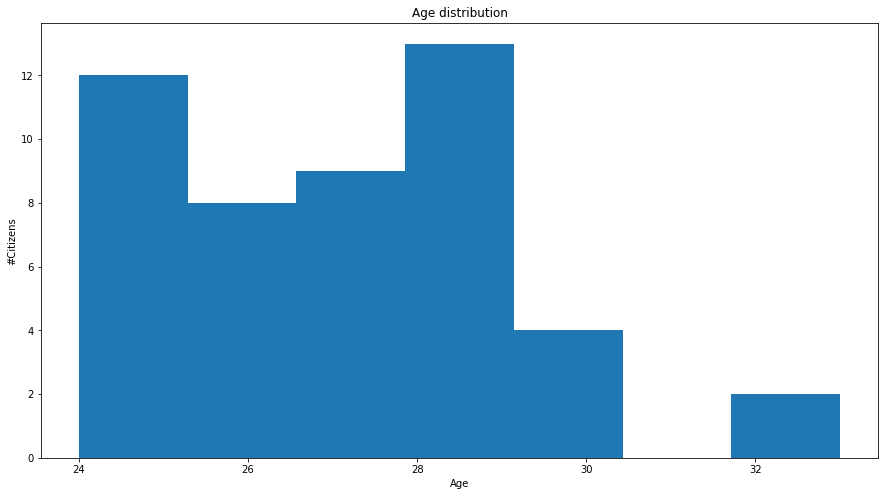

In [85]:
fig=plt.figure(figsize=(15,8))
#Create one or more subplots using add_subplot, because you can't create blank figure
ax = fig.add_subplot(1,1,1)
#Variable
ax.hist(dfvote['Age'],bins = 7) # Here you can play with number of bins Labels and Tit
plt.title('Age distribution')
plt.xlabel('Age')
plt.ylabel('#Citizens')
plt.show()

Box Plot  

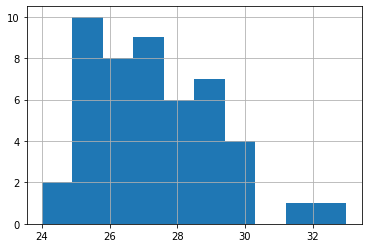

In [86]:
dfvote.Age.hist();

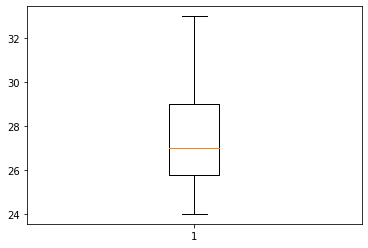

In [87]:
fig=plt.figure()
ax = fig.add_subplot(1,1,1)
ax.boxplot(dfvote['Age'])
plt.show()

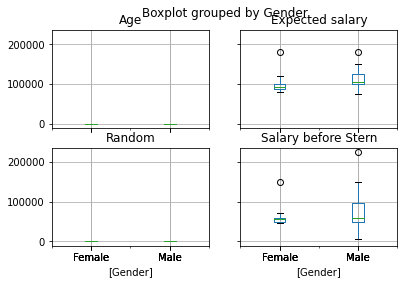

In [88]:
dfvote.boxplot(by='Gender');

Violin Plot (using Seaborn)  
Obs: Seaborn changes some settings on matplotlib  An alternative is to import this way:  
import seaborn.apionly as sns

/home/rsouza/Documents/envs/python_env/lib/python3.6/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


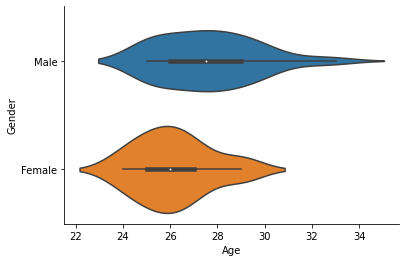

In [89]:
import seaborn as sns
sns.violinplot(dfvote['Age'], dfvote['Gender'])
sns.despine()

Bar Chart  

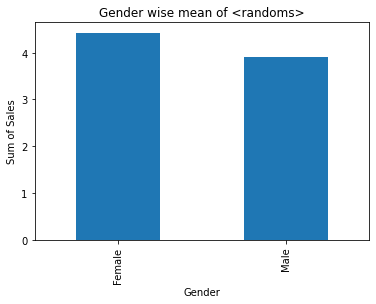

In [90]:
#var = df.groupby('Gender').Random.sum() #grouped sum of <randoms> at Gender level
var = dfvote.groupby('Gender').Random.mean() #grouped mean of <randoms> at Gender level
fig = plt.figure()
ax1 = fig.add_subplot(1,1,1)
ax1.set_xlabel('Gender')
ax1.set_ylabel('Sum of Sales')
ax1.set_title("Gender wise mean of <randoms>") #sum or mean
var.plot(kind='bar');

Line Chart  

<AxesSubplot:title={'center':'Candidate wise mean of ages'}, xlabel='Candidate', ylabel='Mean of Ages'>

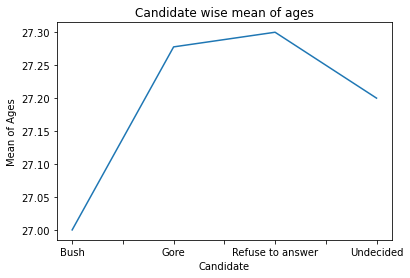

In [91]:
var = dfvote.groupby('Candidate').Age.mean()
fig = plt.figure()
ax1 = fig.add_subplot(1,1,1)
#ax1.set_xlabel('Candidate')
ax1.set_ylabel('Mean of Ages')
ax1.set_title("Candidate wise mean of ages")
var.plot(kind='line')

Stacked Column Chart  

<AxesSubplot:xlabel='Age'>

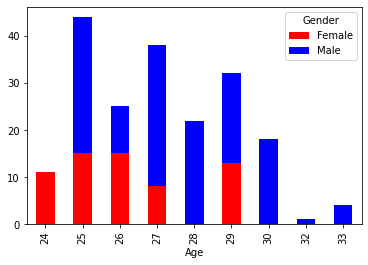

In [92]:
var = dfvote.groupby(['Age','Gender']).Random.sum()
var.unstack().plot(kind='bar',stacked=True,  color=['red','blue'], grid=False)

Scatter Plot  

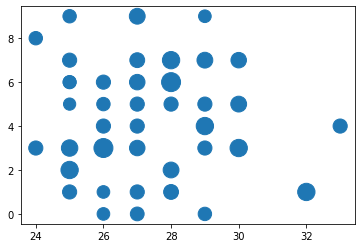

In [93]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.scatter(dfvote['Age'],dfvote['Random'],s=dfvote['Expected salary']/500) #You can also add more variables here to represent color and size.
plt.show()

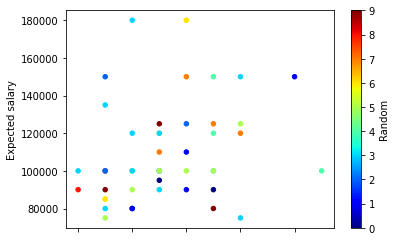

In [94]:
dfvote.plot.scatter(x='Age',y='Expected salary', c='Random', cmap='jet');

Bubble Plot  

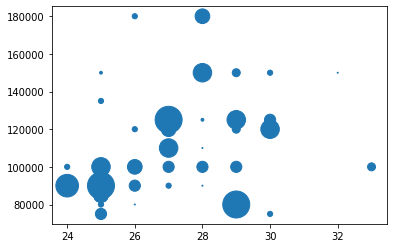

In [95]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
# Added third variable income as size of the bubble
ax.scatter(dfvote['Age'],dfvote['Expected salary'], s=dfvote['Random']**3)
plt.show()

Pie chart  

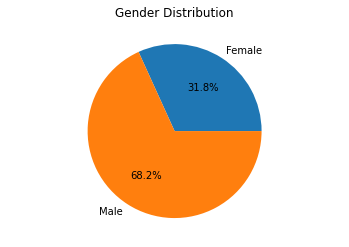

In [96]:
var=dfvote.groupby(['Gender']).sum().stack()
temp=var.unstack()
type(temp)
x_list = temp['Random']
label_list = temp.index
#The pie chart is oval by default. To make it a circle use plt.axis("equal")
plt.axis("equal")
#To show the percentage of each pie slice, pass an output format to the autopctparameter 
plt.pie(x_list,labels=label_list,autopct="%1.1f%%") 
plt.title("Gender Distribution")
plt.show()

Heat Map  

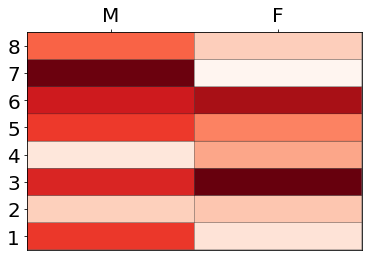

[[0.63344815 0.11296189]
 [0.18866598 0.21752565]
 [0.69491853 0.98744009]
 [0.09577614 0.31654302]
 [0.6251303  0.42400348]
 [0.73374963 0.85664553]
 [0.9770533  0.00940272]
 [0.51425885 0.19223602]]


In [97]:
#Generate a random number, you can refer your data values also
data = np.random.rand(8,2)
rows = list('12345678') #rows categories
columns = list('MF') #column categories

fig,ax=plt.subplots()
#Advance color controls
ax.pcolor(data,cmap=plt.cm.Reds,edgecolors='k')
# Here we position the tick labels for x and y axis
ax.set_xticks(np.arange(0,2)+0.5)
ax.set_yticks(np.arange(0,8)+0.5)
ax.xaxis.tick_top()
ax.yaxis.tick_left()
#Values against each labels
ax.set_xticklabels(columns,minor=False,fontsize=20)
ax.set_yticklabels(rows,minor=False,fontsize=20)
plt.show()
print(data)

## An example: Baby names in the USA

In [99]:
names1880 = pd.read_csv(os.path.join('../Data','names','yob1880.txt'), names=['name', 'sex', 'births'])

In [100]:
names1880[0:20]

,name,sex,births
0,Mary,F,7065
1,Anna,F,2604
2,Emma,F,2003
3,Elizabeth,F,1939
4,Minnie,F,1746
5,Margaret,F,1578
6,Ida,F,1472
7,Alice,F,1414
8,Bertha,F,1320
9,Sarah,F,1288


In [101]:
#names1880.head()
names1880.tail()

,name,sex,births
1995,Woodie,M,5
1996,Worthy,M,5
1997,Wright,M,5
1998,York,M,5
1999,Zachariah,M,5


In [102]:
names1880.groupby('sex').births.sum()

sex
F     90993
M    110491
Name: births, dtype: int64

In [104]:
years = range(1880, 2013)
pieces = []
columns = ['name', 'sex', 'births']
for year in years:
    path = os.path.join('../Data','names','yob{}.txt'.format(year))
    frame = pd.read_csv(path, names=columns)
    frame['year'] = year
    pieces.append(frame)
# Concatenate everything into a single DataFrame
names = pd.concat(pieces, ignore_index=True)

In [105]:
names
names.head(10)

,name,sex,births,year
0,Mary,F,7065,1880
1,Anna,F,2604,1880
2,Emma,F,2003,1880
3,Elizabeth,F,1939,1880
4,Minnie,F,1746,1880
5,Margaret,F,1578,1880
6,Ida,F,1472,1880
7,Alice,F,1414,1880
8,Bertha,F,1320,1880
9,Sarah,F,1288,1880


In [106]:
names.groupby('sex').births.sum()

sex
F    163523367
M    166237398
Name: births, dtype: int64

In [107]:
total_births = names.pivot_table('births', index='year', columns='sex', aggfunc=sum)

In [108]:
total_births

sex,F,M
year,,
1880,90993,110491
1881,91955,100746
1882,107850,113687
1883,112322,104630
1884,129022,114445
...,...,...
2008,1886109,2035075
2009,1831382,1977632
2010,1770632,1911572


In [109]:
total_births.tail()

sex,F,M
year,,
2008,1886109,2035075
2009,1831382,1977632
2010,1770632,1911572
2011,1750078,1889557
2012,1743626,1877705


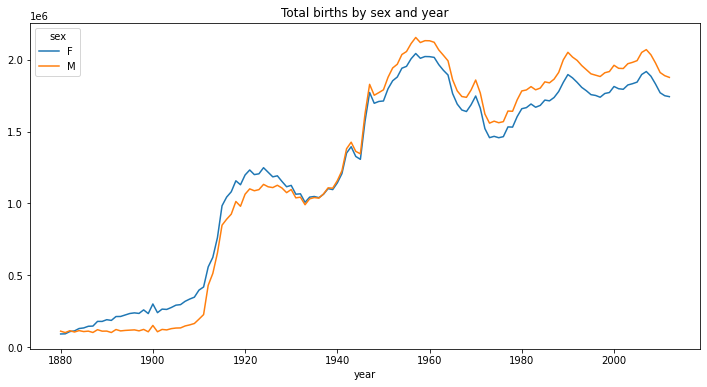

In [122]:
total_births.plot(title='Total births by sex and year', figsize=(12,6));

In [111]:
def add_prop(group):
    # Integer division floors
    births = group.births.astype(float)
    group['percent'] = births / births.sum()
    return group

names = names.groupby(['year', 'sex']).apply(add_prop)

In [112]:
#names
names.head()

,name,sex,births,year,percent
0,Mary,F,7065,1880,0.077643
1,Anna,F,2604,1880,0.028618
2,Emma,F,2003,1880,0.022013
3,Elizabeth,F,1939,1880,0.021309
4,Minnie,F,1746,1880,0.019188


In [113]:
names[names.percent > 0.085]

,name,sex,births,year,percent
942,John,M,9655,1880,0.087383
943,William,M,9532,1880,0.086269
2938,John,M,8769,1881,0.087041
7116,John,M,8894,1883,0.085004


In [114]:
names[names.name.str.startswith('Renat')]

,name,sex,births,year,percent
54444,Renata,F,5,1900,0.000017
64071,Renata,F,7,1903,0.000027
78536,Renata,F,7,1907,0.000022
95342,Renata,F,9,1911,0.000022
98383,Renato,M,5,1911,0.000022
...,...,...,...,...,...
1713405,Renato,M,49,2011,0.000026
1725936,Renata,F,369,2012,0.000212
1730375,Renatta,F,27,2012,0.000015
1735400,Renatha,F,11,2012,0.000006


In [115]:
np.allclose(names.groupby(['year', 'sex']).percent.sum(), 1)

True

In [116]:
def get_top1000(group):
    return group.sort_values(by='births', ascending=False)[:1000]

grouped = names.groupby(['year', 'sex'])
top1000 = grouped.apply(get_top1000)

In [117]:
#top1000
pd.options.display.float_format = '{:,.3f}'.format
top1000[:15]

name sex  births  year  percent
year sex                                         
1880 F   0        Mary   F    7065  1880    0.078
         1        Anna   F    2604  1880    0.029
         2        Emma   F    2003  1880    0.022
         3   Elizabeth   F    1939  1880    0.021
         4      Minnie   F    1746  1880    0.019
         5    Margaret   F    1578  1880    0.017
         6         Ida   F    1472  1880    0.016
         7       Alice   F    1414  1880    0.016
         8      Bertha   F    1320  1880    0.015
         9       Sarah   F    1288  1880    0.014
         10      Annie   F    1258  1880    0.014
         11      Clara   F    1226  1880    0.013
         12       Ella   F    1156  1880    0.013
         13   Florence   F    1063  1880    0.012
         14       Cora   F    1045  1880    0.011

In [118]:
boys = top1000[top1000.sex == 'M']
girls = top1000[top1000.sex == 'F']

In [119]:
Walter_names = boys[boys.name=='Bob']
Walter_names[:10]

,,,name,sex,births,year,percent
year,sex,,,,,,
1880,M,1185,Bob,M,46,1880,0.000
1881,M,3155,Bob,M,50,1881,0.000
1882,M,5174,Bob,M,59,1882,0.001
1883,M,7305,Bob,M,62,1883,0.001
1884,M,9557,Bob,M,50,1884,0.000
1885,M,11866,Bob,M,52,1885,0.000
1886,M,14218,Bob,M,66,1886,0.001
1887,M,16606,Bob,M,74,1887,0.001
1888,M,19203,Bob,M,59,1888,0.000


In [120]:
total_births_top1000 = top1000.pivot_table('births', index='year', columns='name', aggfunc=sum)

ValueError: 'year' is both an index level and a column label, which is ambiguous.

In [ ]:
subset = total_births_top1000[['John', 'Harry', 'Mary', 'Marilyn']]
subset.plot(subplots=True, figsize=(12, 10), grid=False,
title="Number of births per year")

In [ ]:
table = top1000.pivot_table('percent', index='year', columns='sex', aggfunc=sum)
table.plot(title='Sum of table1000.percent by year and sex', yticks=np.linspace(0, 1.2, 13), xticks=range(1880, 2020, 10))

In [ ]:
df = boys[boys.year == 2010]
prop_cumsum = df.sort_values(by='percent', ascending=False).percent.cumsum()

In [ ]:
def get_quantile_count(group, q=0.5):
    group = group.sort_values(by='percent', ascending=False)
    return group.percent.cumsum().values.searchsorted(q) + 1

prop_cumsum.values.searchsorted(0.5)

In [ ]:
diversity = top1000.groupby(['year', 'sex']).apply(get_quantile_count)
diversity = diversity.unstack('sex')
diversity.head()

In [ ]:
diversity.plot(title="Number of popular names in top 50%")

In [ ]:
# extract last letter from name column
get_last_letter = lambda x: x[-1]
last_letters = names.name.map(get_last_letter)
last_letters.name = 'last_letter'
table = names.pivot_table('births', index=last_letters, columns=['sex', 'year'], aggfunc=sum)
subtable = table.reindex(columns=[1910, 1960, 2010], level='year')
subtable.head()

In [ ]:
subtable.sum()

In [ ]:
letter_prop = subtable / subtable.sum().astype(float)

In [ ]:
fig, axes = plt.subplots(2, 1, figsize=(10, 8))
letter_prop['M'].plot(kind='bar', rot=0, ax=axes[0], title='Male')
letter_prop['F'].plot(kind='bar', rot=0, ax=axes[1], title='Female',legend=False)

In [ ]:
letter_prop = table / table.sum().astype(float)
dny_ts = letter_prop.ix[['d', 'n', 'y'], 'M'].T
dny_ts.head()

In [ ]:
dny_ts.plot()

In [ ]:
all_names = top1000.name.unique()
mask = np.array(['lesl' in x.lower() for x in all_names])
lesley_like = all_names[mask]
lesley_like

In [ ]:
filtered = top1000[top1000.name.isin(lesley_like)]
filtered.groupby('name').births.sum()

In [ ]:
table = filtered.pivot_table('births', index='year', columns='sex', aggfunc='sum')
table = table.div(table.sum(1), axis=0)
table.tail()

In [ ]:
table.plot(style={'M': 'k-', 'F': 'k--'})